# **NAIVE BAYES**

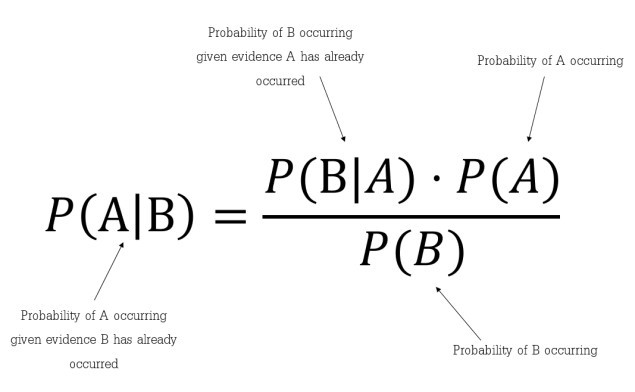

## ***IMPORTING LIBRARIES***

In [54]:
import numpy as np
import pandas as pd

## ***LOADING THE DATASET***

In [55]:
data = pd.read_csv("survive.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## ***SUMMARIZING THE DATASET***

In [56]:
print(data.shape)
print(data.head())

(418, 12)
   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0          892         0       3  ...   7.8292   NaN         Q
1          893         1       3  ...   7.0000   NaN         S
2          894         0       2  ...   9.6875   NaN         Q
3          895         0       3  ...   8.6625   NaN         S
4          896         1       3  ...  12.2875   NaN         S

[5 rows x 12 columns]


## ***PRE-PROCESSING THE DATASET***

In [57]:
data = data.drop(["PassengerId","Name","Parch","Ticket","Cabin","Embarked"],axis=1)
data

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,34.5,0,7.8292
1,1,3,female,47.0,1,7.0000
2,0,2,male,62.0,0,9.6875
3,0,3,male,27.0,0,8.6625
4,1,3,female,22.0,1,12.2875
...,...,...,...,...,...,...
413,0,3,male,NaN,0,8.0500
414,1,1,female,39.0,0,108.9000
415,0,3,male,38.5,0,7.2500
416,0,3,male,NaN,0,8.0500


In [58]:
data.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Fare         1
dtype: int64

In [59]:
data.Age = data.Age.fillna(data.Age.mean())

In [60]:
data.Fare = data.Fare.fillna(data.Fare.mean())

In [61]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
dtype: int64

In [62]:
data

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,34.50000,0,7.8292
1,1,3,female,47.00000,1,7.0000
2,0,2,male,62.00000,0,9.6875
3,0,3,male,27.00000,0,8.6625
4,1,3,female,22.00000,1,12.2875
...,...,...,...,...,...,...
413,0,3,male,30.27259,0,8.0500
414,1,1,female,39.00000,0,108.9000
415,0,3,male,38.50000,0,7.2500
416,0,3,male,30.27259,0,8.0500


## ***MAPPING THE SEX COLUMN TO BINARY VALUE***

In [63]:
data["Sex"] = data["Sex"].map({"male":1,"female":0}).astype(int)

In [64]:
data

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,1,34.50000,0,7.8292
1,1,3,0,47.00000,1,7.0000
2,0,2,1,62.00000,0,9.6875
3,0,3,1,27.00000,0,8.6625
4,1,3,0,22.00000,1,12.2875
...,...,...,...,...,...,...
413,0,3,1,30.27259,0,8.0500
414,1,1,0,39.00000,0,108.9000
415,0,3,1,38.50000,0,7.2500
416,0,3,1,30.27259,0,8.0500


## ***SEGREGATING THE DATASET INTO INPUT AND OUPUT***

In [65]:
input  = data.iloc[ : , 1: ].values
print(input)
output = data.iloc[ : , 0].values
print(output)

[[ 3.          1.         34.5         0.          7.8292    ]
 [ 3.          0.         47.          1.          7.        ]
 [ 2.          1.         62.          0.          9.6875    ]
 ...
 [ 3.          1.         38.5         0.          7.25      ]
 [ 3.          1.         30.27259036  0.          8.05      ]
 [ 3.          1.         30.27259036  1.         22.3583    ]]
[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0

## ***FEATURE SCALING***

In [66]:
from sklearn.preprocessing import StandardScaler
scaling      = StandardScaler()
scaled_input = scaling.fit_transform(input)

scaled_input

array([[ 0.87348191,  0.75592895,  0.3349926 , -0.49947002, -0.49840706],
       [ 0.87348191, -1.32287566,  1.32553003,  0.61699237, -0.51327429],
       [-0.31581919,  0.75592895,  2.51417495, -0.49947002, -0.46508846],
       ...,
       [ 0.87348191,  0.75592895,  0.65196458, -0.49947002, -0.50879189],
       [ 0.87348191,  0.75592895,  0.        , -0.49947002, -0.4944482 ],
       [ 0.87348191,  0.75592895,  0.        ,  0.61699237, -0.23790598]])

## ***SPLITTING THE DATASET INTO TRAIN AND TEST DATA***

In [67]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_input,output)


## ***TRAINING THE DATASET***

In [68]:
from sklearn.naive_bayes import GaussianNB

Naive_Bayes_Model = GaussianNB()

Naive_Bayes_Model.fit(x_train,y_train)

GaussianNB()

## ***PREDICTING THE RESULT USING THE TRAINED MODEL***

In [69]:
y_pred = Naive_Bayes_Model.predict(x_test)
y_pred

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0])

## ***CALCULATING THE ACCURACY OF THE TRAINED MODEL***

In [70]:
from sklearn.metrics import accuracy_score

print("accuracy_score:",accuracy_score(y_pred,y_test)*100,"%")

accuracy_score: 100.0 %


## ***PREDICTING THE OUTPUT OF SINGLE TEST DATA USING THE TRAINED MODEL***

In [76]:
print("ACUTAL OUTPUT: ",y_test[83])
print("PREDICTED OUTPUT: ")
Naive_Bayes_Model.predict(np.reshape(x_test[83],(1,5)))

ACUTAL OUTPUT:  1
PREDICTED OUTPUT: 


array([1])